# Equal-weighted Portfolio

In [1]:
#-----------------------------------------------------------------------------
# Imports libraries and defines variables 
#-----------------------------------------------------------------------------

# Imports libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

# Parameters
janela_retornos = 252
janela_rebal = 126
custo = 0.01

# File Path
str_dir = 'C:/Users/nelly/Desktop/Mestrado Insper/DISSERTAÇÃO/Dissertação/1. Modelo/'

# Returns
str_Retornos = 'Retornos'
    
df_Retornos = pd.read_csv(filepath_or_buffer = str_dir + str_Retornos + '.csv', sep=';')
df_Retornos.index = df_Retornos['Data']
df_Retornos = df_Retornos.drop(columns=['Data'])
df_Retornos = df_Retornos.dropna()
    
df_Retornos['indice']=np.zeros(len(df_Retornos.index))

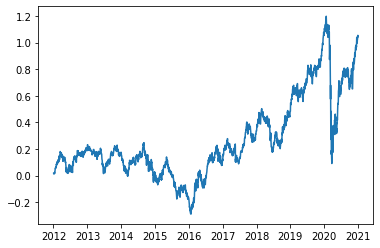

In [2]:
#-----------------------------------------------------------------------------
# Adjusts the dates formats and computes portfolio returns
#-----------------------------------------------------------------------------

# Adjusts the dates formats

for x in range(0,len(df_Retornos.index)):
    df_Retornos.iloc[x,len(df_Retornos.columns)-1] = datetime.datetime(df_Retornos.iloc[x,2],df_Retornos.iloc[x,1], df_Retornos.iloc[x,0])
    
df_Retornos = df_Retornos.drop(columns=['Day', 'Month', 'Year'])
df_Retornos.index = df_Retornos['indice']
df_Retornos = df_Retornos.drop(columns=['indice'])
df_Retornos_disc = np.exp(df_Retornos) - 1

# Computes portfolio returns

n_stocks_total = len(df_Retornos.columns)
df_weights = pd.DataFrame()
t = 0
T = len(df_Retornos)
while t <= T:
    df_Retornos_cum = df_Retornos.iloc[t:(t+janela_rebal),:].cumsum()
    df_Retornos_cum_disc = np.exp(df_Retornos_cum)
    df_weights = pd.concat([df_weights,df_Retornos_cum_disc.div(df_Retornos_cum_disc.sum(axis = 1), axis = 0)], axis = 0)
    df_weights.iloc[t,:] = np.ones(n_stocks_total)/n_stocks_total
    t = t + janela_rebal
df_weights.index = df_weights.index

df_Retornos_EW_disc = df_Retornos_disc[df_Retornos_disc.index.isin(df_weights.index)]

#df_ret_port_EW_disc = (df_weights.shift(1).dropna() * df_Retornos_EW_disc.iloc[:-1,:]).sum(axis=1)
df_ret_port_EW_disc = np.array(df_weights.iloc[:-1,:]) * np.array(df_Retornos_EW_disc.iloc[1:,:])
df_ret_port_EW_disc = pd.DataFrame(data = df_ret_port_EW_disc).sum(axis=1)
str_index = df_Retornos_EW_disc.iloc[1:,:].index

df_ret_port_EW_disc = np.array(df_ret_port_EW_disc) - np.array(np.abs(df_weights.diff(1)).dropna().sum(axis=1)*custo)

df_ret_port_EW_disc = pd.Series(data = df_ret_port_EW_disc, index = str_index)

df_ret_port_EW = np.log(1+df_ret_port_EW_disc)

sns.lineplot(data = np.exp(df_ret_port_EW.cumsum())-1)

df_ret_port_EW.to_csv(str_dir + 'EW.csv')

In [3]:
np.array(df_weights.iloc[:-1,:]).shape

(2348, 34)

In [4]:
(np.array(df_weights.iloc[:-1,:]) * np.array(df_Retornos_EW_disc.iloc[1:,:])).shape

(2348, 34)

In [5]:
np.array(np.abs(df_weights.diff(1)).dropna().sum(axis=1)*custo).shape

(2348,)

In [6]:
len(str_index)

2348

In [8]:
len(df_ret_port_EW_disc)

2348